In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

In [ ]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


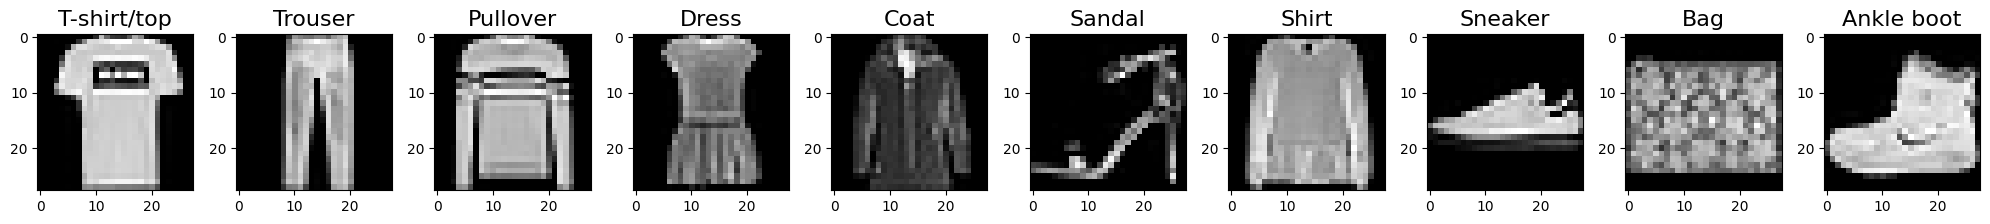

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20, 20))
for i in range(0, num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(class_names[i], fontsize=16)
plt.tight_layout()
plt.show()



In [ ]:
print(y_train[0])


9


In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [ ]:
print(y_train[0])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [ ]:
model = Sequential()
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 512
epochs = 10
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_split=0.2, verbose=1)


Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.5743 - loss: 1.2130 - val_accuracy: 0.8219 - val_loss: 0.5058
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8131 - loss: 0.5355 - val_accuracy: 0.8486 - val_loss: 0.4286
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8404 - loss: 0.4540 - val_accuracy: 0.8574 - val_loss: 0.3916
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8542 - loss: 0.4104 - val_accuracy: 0.8676 - val_loss: 0.3701
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8598 - loss: 0.3844 - val_accuracy: 0.8732 - val_loss: 0.3569
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8655 - loss: 0.3704 - val_accuracy: 0.8704 - val_loss: 0.3504
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8736 - loss: 0.3517 - val_accuracy: 0.8763 - val_loss: 0.3415
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8732 - loss: 0.3486 - val_accuracy: 0.8756 - val_loss

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8765 - loss: 0.3414

Test accuracy: 0.875


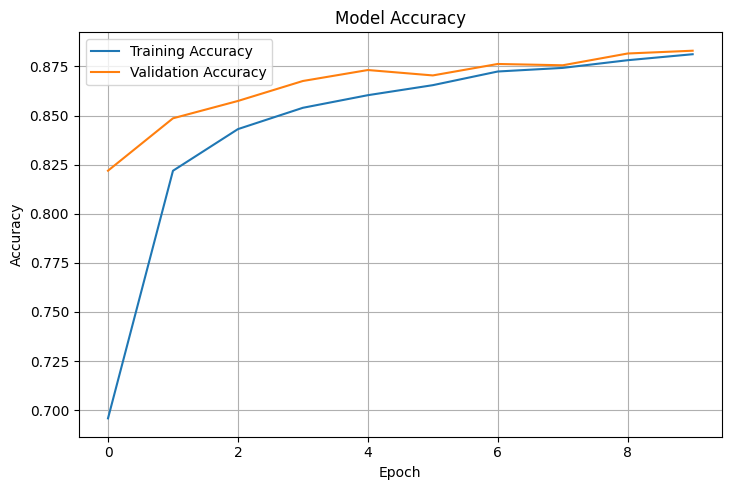

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=1)
print('\nTest accuracy:', test_acc)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

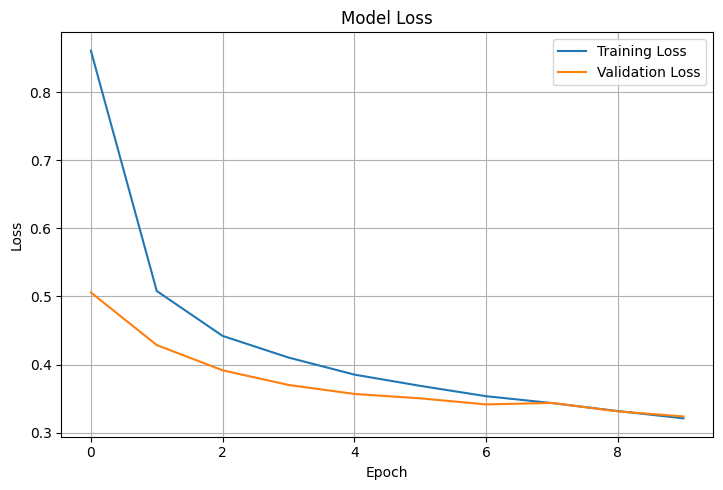

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


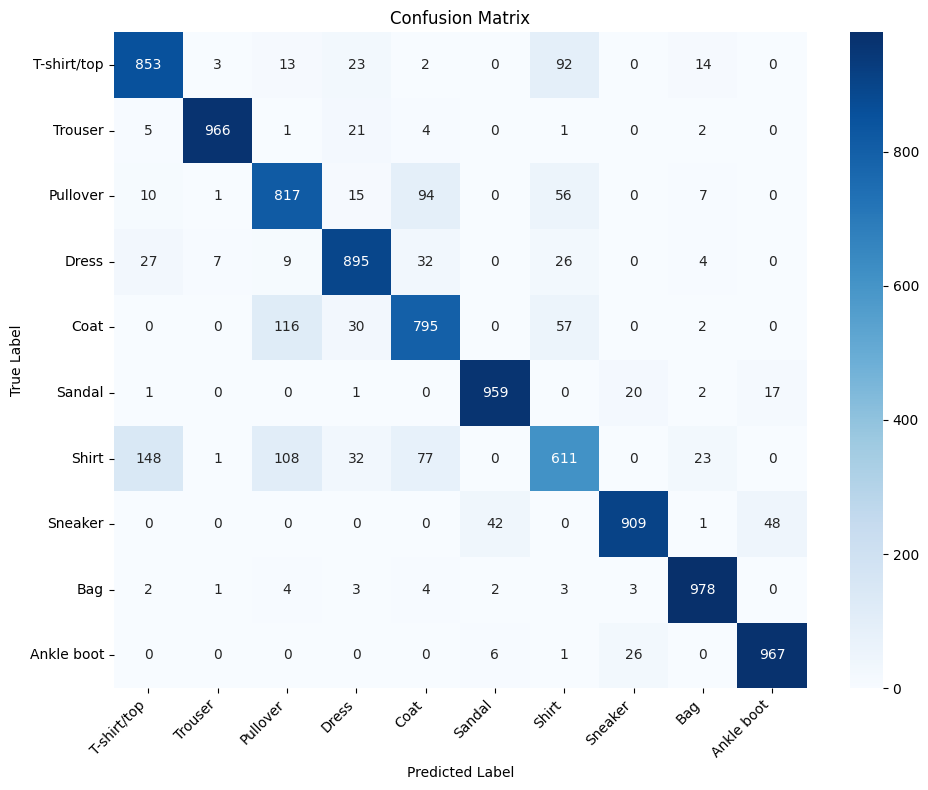

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

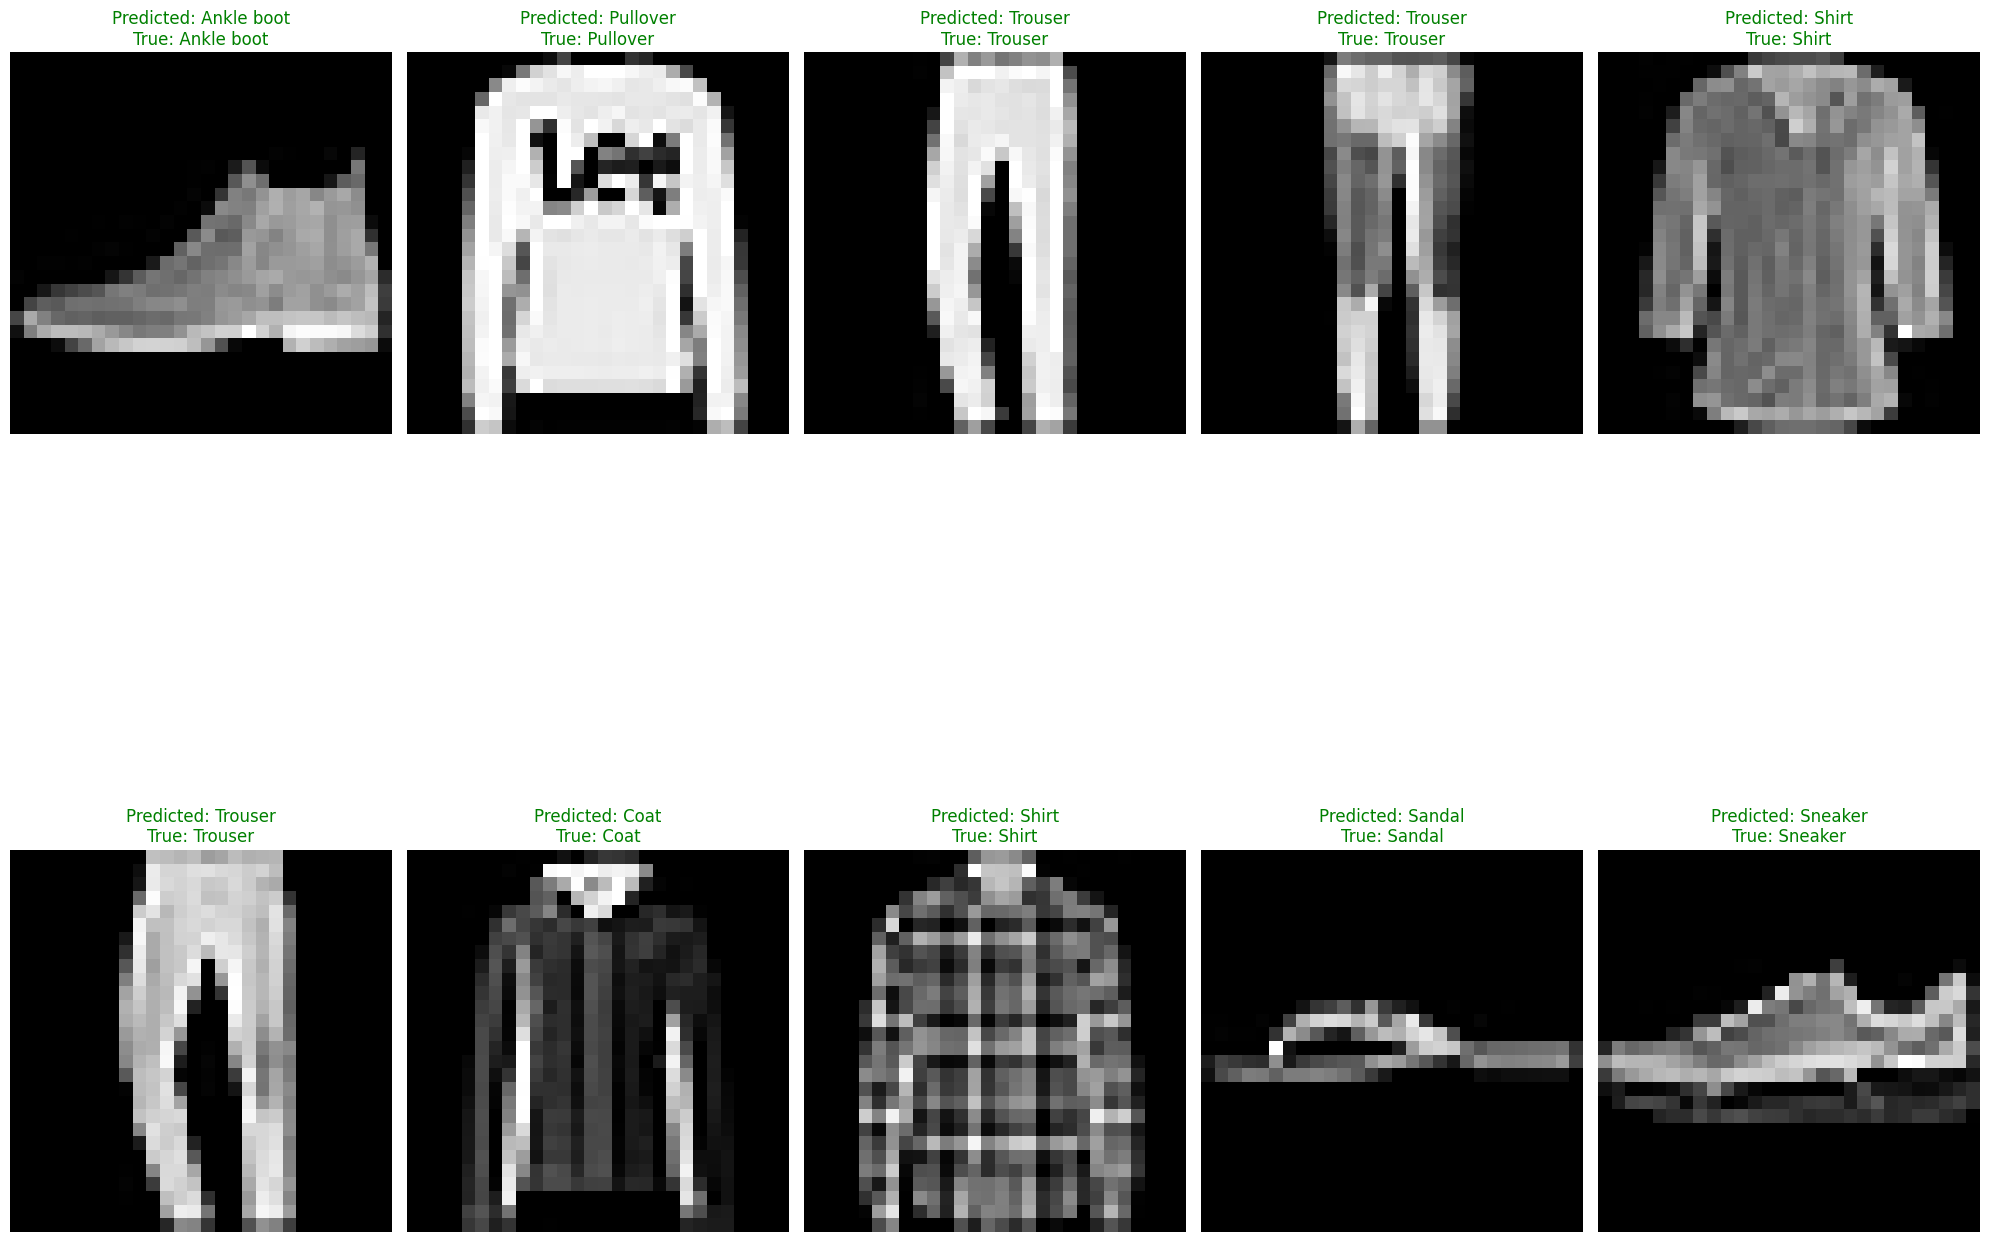

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(0, num_classes):
    plt.subplot(2, 5, i + 1)
    sample = x_test[i].reshape(28, 28)
    plt.imshow(sample, cmap='gray')
    pred_label = class_names[y_pred_classes[i]]
    true_label = class_names[y_test[i]]
    if y_pred_classes[i] == y_test[i]:
        plt.title(f"Predicted: {pred_label}\nTrue: {true_label}", color='green')
    else:
        plt.title(f"Predicted: {pred_label}\nTrue: {true_label}", color='red')
    plt.axis('off')
plt.tight_layout()
plt.show()